# Garmin Rowing Report

In [1]:
import tcxtools
import graph
import helper
import correlation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# TCX and CSV files name without extension

In [2]:
filename = 'activity_5348759230'

# Reading .TCX file

In [3]:
tcx_data = tcxtools.TCXPandas('./rowing/' + filename + '.tcx')
tracks, laps = tcx_data.parse()
tracks = tracks.set_index('time')

# Reading .CSV file

In [4]:
csv_data = pd.read_csv('./rowing/' + filename + '.csv')

# Calculating time in seconds
csv_data['Time (s)'] = csv_data['Time'].apply(helper.get_sec)

# Calculating Power in watts
csv_data['Power (w)'] = csv_data['Calories'] * 4184 / csv_data['Time (s)']

# Calculating Energy in kilojoules
csv_data['Energy (kj)'] = (csv_data['Power (w)'] * csv_data['Time (s)']) / 1000

csv = csv_data.head(-1)
csv = csv[~(csv['Calories'] == 0)]

In [5]:
csv

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg HR,Max HR,Avg Stroke Rate,Max Stroke Rate,Calories,Moving Time,Time (s),Power (w),Energy (kj)
0,1,50:12,50:12,0,0,162,188,26,44,557,0,3012,773.734396,2330.488


# Laps

In [6]:
laps = laps[~(laps['calories'] == 0)]

# Calculating energy (kilojoules)
laps['energy (kj)'] = (laps['power (w)'] * laps['time (s)']) / 1000

# Calculating calories per second
laps['avg cal/s'] = laps['calories'] / laps['time (s)']

laps

,avg hr,calories,distance (m),max hr,power (w),time (s),energy (kj),avg cal/s
0,162,557,0.0,188,773.478,3013,2330.489214,0.184866


In [7]:
laps['avg cal/s'].describe()

count    1.000000
mean     0.184866
std           NaN
min      0.184866
25%      0.184866
50%      0.184866
75%      0.184866
max      0.184866
Name: avg cal/s, dtype: float64

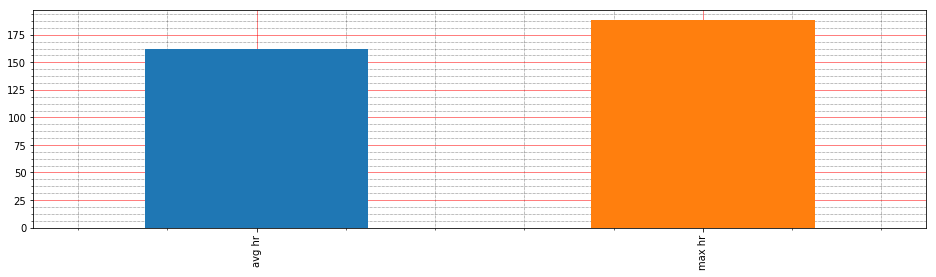

In [8]:
graph.mean(laps[['avg hr', 'max hr']])

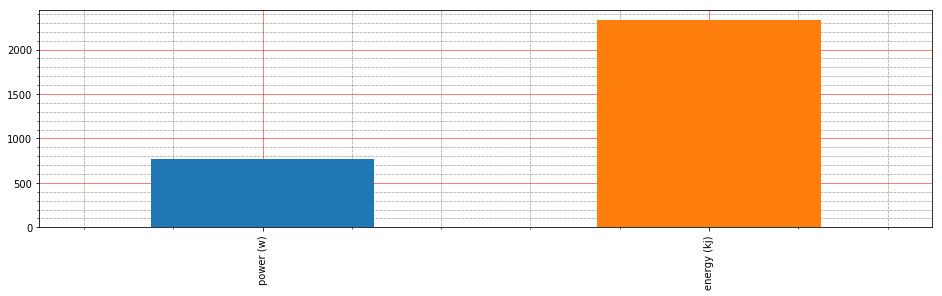

In [9]:
graph.mean(laps[['power (w)', 'energy (kj)']])

# Tracking points

In [10]:
# droping NaN
tracks.dropna(inplace=True)

# renaming column
tracks.rename(columns={'distance':'distance cumulative'}, inplace=True)

# Getting the distance at each tracking point
tracks['distance'] = tracks['distance cumulative'].diff()

tracks

,distance cumulative,hr,distance
time,,,
2020-08-07 10:09:07+00:00,0.0,92,NaN
2020-08-07 10:09:08+00:00,0.0,93,0.0
2020-08-07 10:09:09+00:00,0.0,93,0.0
2020-08-07 10:09:11+00:00,0.0,94,0.0
2020-08-07 10:09:12+00:00,0.0,94,0.0
2020-08-07 10:09:13+00:00,0.0,96,0.0
2020-08-07 10:09:14+00:00,0.0,103,0.0
2020-08-07 10:09:15+00:00,0.0,104,0.0
2020-08-07 10:09:16+00:00,0.0,104,0.0


# Distance at each tracking point

In [11]:
tracks['distance'].describe()

count    3008.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: distance, dtype: float64

# Total Distance (meters)

In [12]:
round(tracks['distance cumulative'].tail(1).values[0], 3)

0.0

# Speed (km/h) per Tracking Point

In [13]:
speed = tracks[~(tracks['speed (km/h)'] <= 1.85)]
speed['speed (km/h)'].describe()

KeyError: 'speed (km/h)'

In [ ]:
speed['speed (km/h)'].plot(figsize=(16,4))
plt.title('SPEED (km/h)')
plt.grid()

# Max Speed (km/h) per Lap

In [ ]:
laps['max speed (km/h)'].describe()

# Power (watts)

In [14]:
laps['power (w)'].describe()

count      1.000
mean     773.478
std          NaN
min      773.478
25%      773.478
50%      773.478
75%      773.478
max      773.478
Name: power (w), dtype: float64

# Power (w) vs Speed (km/h)

In [ ]:
graph.overlay(csv.Laps, laps['power (w)'], laps['max speed (km/h)'])

# Energy (kj)

In [ ]:
laps['energy (kj)'].describe()

# Energy (kj) vs Power (watts)

In [ ]:
graph.overlay(csv.Laps, laps['energy (kj)'], laps['power (w)'])

# Energy (kj) vs Speed (km/h)

In [ ]:
graph.overlay(csv.Laps, laps['energy (kj)'], laps['max speed (km/h)'])

# Heart Rate (bpm)

In [15]:
tracks['hr'].describe()

count    3009.000000
mean      162.351944
std        17.869469
min        88.000000
25%       154.000000
50%       164.000000
75%       176.000000
max       188.000000
Name: hr, dtype: float64

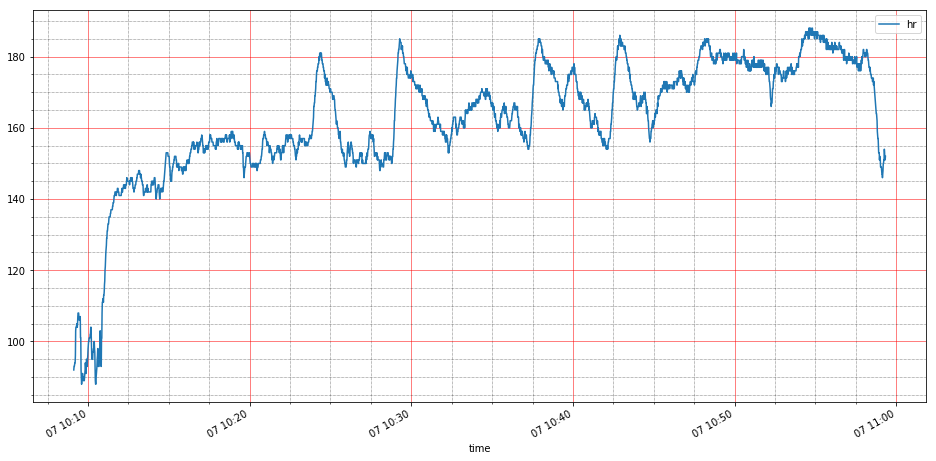

In [18]:
graph.heartrate(tracks['hr'])

# Avg Heart Rate vs Power

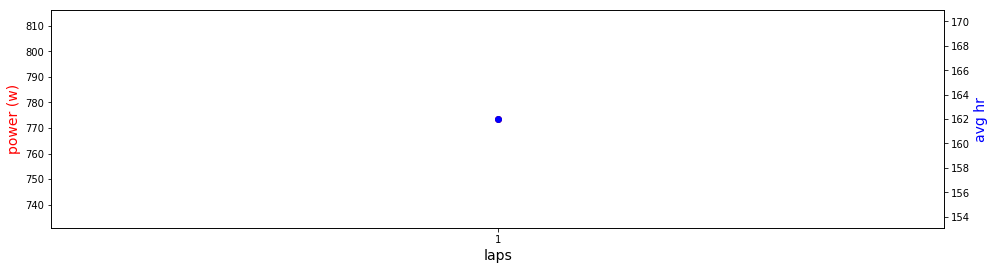

In [16]:
graph.overlay(csv.Laps, laps['power (w)'], laps["avg hr"])

# Avg Heart Rate vs Max Speed per lap

In [ ]:
graph.overlay(csv.Laps, laps['max speed (km/h)'], laps["avg hr"])

# Avg Stroke Rate

In [ ]:
csv['Avg Stroke Rate'].describe()

In [ ]:
graph.overlay(csv.Laps, csv['Avg Stroke Rate'], laps['max speed (km/h)'])

# Max Stroke Rate

In [ ]:
csv['Max Stroke Rate'].describe()

In [ ]:
graph.overlay(csv.Laps, csv['Max Stroke Rate'], laps['max speed (km/h)'])

# Avg Distance per Stroke (meters)

In [ ]:
csv['Avg Distance per Stroke'].describe()

In [ ]:
graph.overlay(csv.Laps, csv['Avg Distance per Stroke'], laps['max speed (km/h)'])

# Correlation

In [ ]:
csv_corr = csv[['Avg HR', 'Max HR', 'Calories', 'Max Stroke Rate', 'Avg Stroke Rate', 'Power (w)', 'Energy (kj)']]
corr = correlation.get_number(csv_corr)
corr

In [ ]:
correlation.heatmap(corr)